<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/TSP_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Traveling Salesperson Problem (TSP)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import sys
from itertools import permutations

In [39]:
plt.ion()   # turn interactive mode on

In [40]:
def read_cities(filepath):
    '''
    Load a TSP dataset.
    '''
    cities = np.loadtxt(filepath, delimiter=',')
    return cities

In [41]:
def score_solution(cities, solution):
    '''
    Calculate the total distance traveled by the given solution.
    This function scores a TSP solution by computing the total
    distance the salesperson would travel. Lower is better!
    The 'solution' array must contain indices into the 'cities'
    array. Also, the 'solution' array must visit each city exactly
    once!
    '''

    if len(solution) != len(cities):
        raise Exception(('Invalid solution: len(solution) is {}, ' + \
                'but it should be {}.').format(len(solution), len(cities)))

    if set(solution) != set(range(len(cities))):
        raise Exception('Invalid solution: The solution does not ' + \
                'visit each city exactly once!')

    dist = 0.0
    for i in range(len(solution)):
        p_prev = cities[solution[i-1]]
        p_here = cities[solution[i]]
        dist += euclidean(p_prev, p_here)
    return dist


In [42]:
def create_figure():
    '''
    Creates a figure which `visualize_solution()` will draw onto.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    return fig, axes

In [43]:
def visualize_solution(cities, solution, fig=None, axes=None, block=True):
    '''
    Visualize the solution in a 2D plot.
    The 'cities' and 'solution' arguments are the same
    as to the `score_solution()` function.
    '''
    dist = score_solution(cities, solution) if len(solution) == len(cities) else float('NaN')

    if fig is None or axes is None:
        fig, axes = create_figure()
    ax1, ax2 = axes
    fig.suptitle('Total Distance: {}'.format(dist), fontsize=20)

    ax1.clear()
    ax1.scatter(cities[:,0], cities[:,1])

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # <-- the salesperson has to return home!
    else:
        path = solution
    ax2.clear()
    ax2.plot(cities[path,0], cities[path,1])
    ax2.scatter(cities[:,0], cities[:,1])

    if block:
        while plt.fignum_exists(fig.number):
            plt.pause(0.001)
    else:
        plt.pause(0.001)

In [44]:
def tsp_random_search(cities, new_best_solution_func = None):
    '''
    Random search simply randomizes several solutions then
    keeps the one which is best.
    '''
    best_dist = float("inf")
    best_solution = None
    for i in range(1000):
        solution = np.arange(len(cities))
        np.random.shuffle(solution)
        dist = score_solution(cities, solution)
        if dist < best_dist:
            best_dist = dist
            best_solution = solution
            if new_best_solution_func:
                new_best_solution_func(solution)
    return best_solution

In [45]:
!wget https://raw.githubusercontent.com/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/main/data/tsp_data/tiny.csv

--2024-05-25 01:48:32--  https://raw.githubusercontent.com/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/main/data/tsp_data/tiny.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511 [text/plain]
Saving to: ‘tiny.csv’

tiny.csv            100%[===================>]     511  --.-KB/s    in 0s      

2024-05-25 01:48:32 (46.2 MB/s) - ‘tiny.csv’ saved [511/511]



In [46]:
cities = read_cities('tiny.csv')
cities

array([[-1.0856306 , -0.67888615],
       [ 0.99734545, -0.09470897],
       [ 0.2829785 ,  1.49138963],
       [-1.50629471, -0.638902  ],
       [-0.57860025, -0.44398196],
       [ 1.65143654, -0.43435128],
       [-2.42667924,  2.20593008],
       [-0.42891263,  2.18678609],
       [ 1.26593626,  1.0040539 ],
       [-0.8667404 ,  0.3861864 ]])

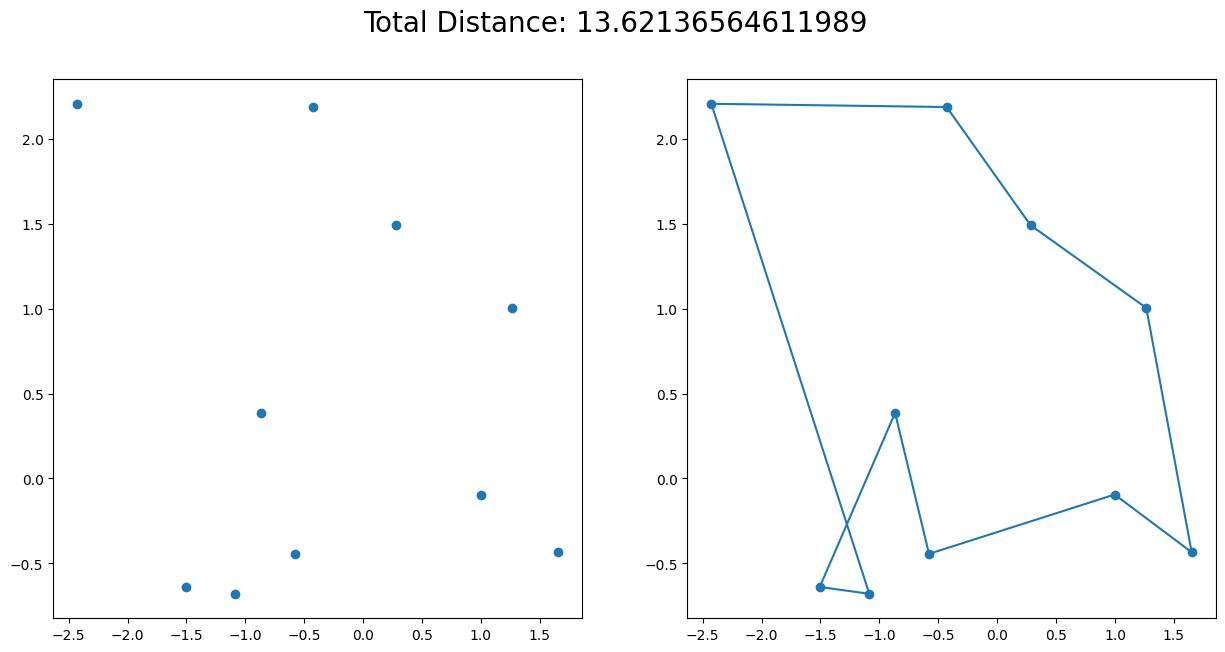

In [47]:
solution = tsp_random_search(cities)
visualize_solution(cities, solution)

In [48]:
def brute_force_tsp_solver(cities, new_best_callback):
    best_dist = float("inf")
    best_solution = None
    indicies = np.arange(1, len(cities))  # we'll force starting at city 0
    for solution in permutations(indicies):
        solution = [0] + list(solution)   # remember, we start at city 0
        dist = score_solution(cities, solution)
        if dist < best_dist:
            best_dist = dist
            best_solution = solution
            new_best_callback(solution)
    return best_solution

In [49]:
def greedy_tsp_solver(cities, new_piece_callback, start_index=0):
    path = [start_index]
    visited = {start_index}
    new_piece_callback(path)
    num_cities = len(cities)
    while len(visited) < num_cities:
        curr_city = path[-1]
        nearest_city = None
        nearest_city_dist = float('inf')
        for i, city in enumerate(cities):
            if i in visited:
                continue
            dist = euclidean(cities[curr_city], city)
            if dist < nearest_city_dist:
                nearest_city = i
                nearest_city_dist = dist
        path.append(nearest_city)
        visited.add(nearest_city)
        new_piece_callback(path)
    return path

Best so far: 22.093417492952092 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


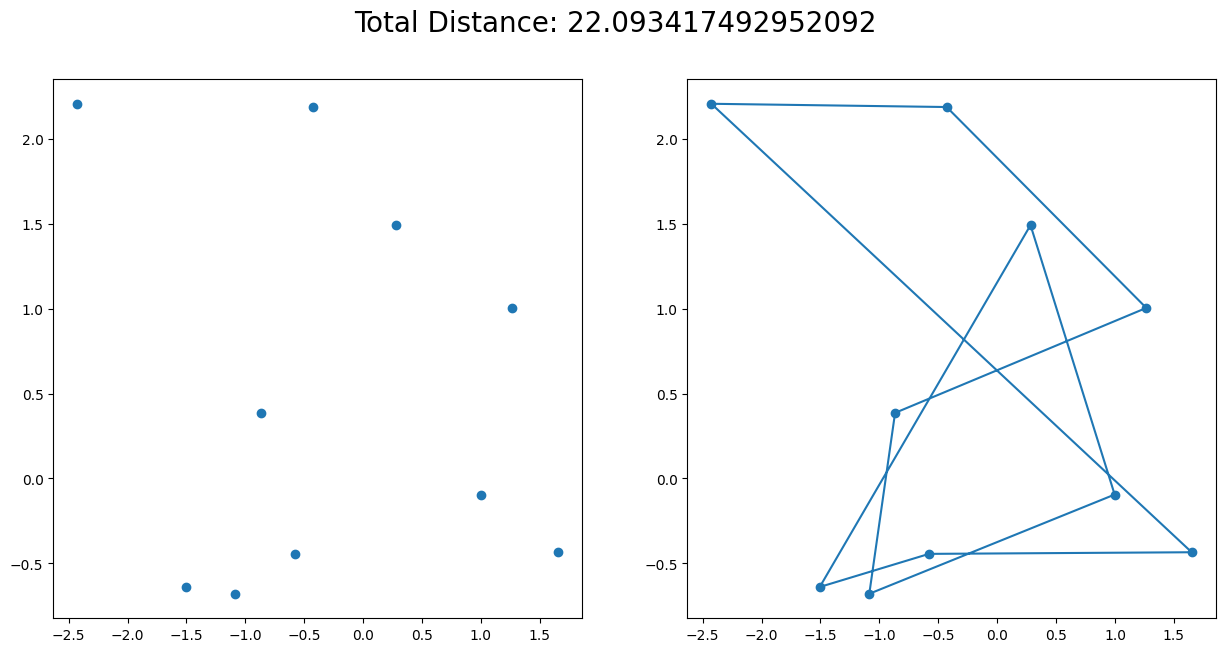

Best so far: 20.173631747901652 [0, 1, 2, 3, 4, 5, 8, 6, 7, 9]
Best so far: 18.90085538114461 [0, 1, 2, 3, 4, 5, 8, 7, 6, 9]
Best so far: 18.63261057152975 [0, 1, 2, 3, 9, 6, 7, 8, 5, 4]
Best so far: 17.83283312430076 [0, 1, 2, 4, 5, 8, 7, 6, 9, 3]
Best so far: 17.737978934550952 [0, 1, 2, 5, 8, 6, 7, 9, 4, 3]
Best so far: 17.723140974536154 [0, 1, 2, 5, 8, 7, 6, 3, 4, 9]
Best so far: 17.454896164921298 [0, 1, 2, 5, 8, 7, 6, 3, 9, 4]
Best so far: 16.930929730595746 [0, 1, 2, 5, 8, 7, 6, 9, 3, 4]
Best so far: 16.465202567793906 [0, 1, 2, 5, 8, 7, 6, 9, 4, 3]
Best so far: 15.614560744397146 [0, 1, 4, 5, 8, 2, 7, 6, 9, 3]
Best so far: 15.536362944453895 [0, 1, 5, 2, 8, 7, 6, 9, 3, 4]
Best so far: 15.070635781652054 [0, 1, 5, 2, 8, 7, 6, 9, 4, 3]
Best so far: 14.854860342721754 [0, 1, 5, 8, 2, 6, 7, 9, 3, 4]
Best so far: 14.389133179919916 [0, 1, 5, 8, 2, 6, 7, 9, 4, 3]
Best so far: 14.383736882374311 [0, 1, 5, 8, 2, 7, 6, 3, 4, 9]
Best so far: 14.115492072759455 [0, 1, 5, 8, 2, 7, 6, 3, 9

In [50]:
fig, axes = create_figure()

def visualize_wrapper(solution, is_final=False):
  print(('FINAL SOLUTION:' if is_final else 'Best so far:'), \
  score_solution(cities, solution), solution)
  visualize_solution(cities, solution, fig, axes, block=is_final)

solution = brute_force_tsp_solver(cities, visualize_wrapper)
visualize_wrapper(solution, True)

In [51]:
def visualize_wrapper(solution, is_final=False):
  print(('FINAL SOLUTION:' if is_final else 'Best so far:'), solution)
  visualize_solution(cities, solution, fig, axes, block=is_final)

best_score = float('inf')
best_solution = None
for start_index in range(len(cities)):
  solution = greedy_tsp_solver(cities, visualize_wrapper, start_index)
  visualize_wrapper(solution, False)
  score = score_solution(cities, solution)
  print('Score:', score)
  if score < best_score:
    best_score = score
    best_solution = solution
visualize_wrapper(best_solution, True)

Best so far: [0]
Best so far: [0, 3]
Best so far: [0, 3, 4]
Best so far: [0, 3, 4, 9]
Best so far: [0, 3, 4, 9, 2]
Best so far: [0, 3, 4, 9, 2, 7]
Best so far: [0, 3, 4, 9, 2, 7, 6]
Best so far: [0, 3, 4, 9, 2, 7, 6, 8]
Best so far: [0, 3, 4, 9, 2, 7, 6, 8, 1]
Best so far: [0, 3, 4, 9, 2, 7, 6, 8, 1, 5]
Best so far: [0, 3, 4, 9, 2, 7, 6, 8, 1, 5]
Score: 15.336459420969808
Best so far: [1]
Best so far: [1, 5]
Best so far: [1, 5, 8]
Best so far: [1, 5, 8, 2]
Best so far: [1, 5, 8, 2, 7]
Best so far: [1, 5, 8, 2, 7, 9]
Best so far: [1, 5, 8, 2, 7, 9, 4]
Best so far: [1, 5, 8, 2, 7, 9, 4, 0]
Best so far: [1, 5, 8, 2, 7, 9, 4, 0, 3]
Best so far: [1, 5, 8, 2, 7, 9, 4, 0, 3, 6]
Best so far: [1, 5, 8, 2, 7, 9, 4, 0, 3, 6]
Score: 15.146832700447895
Best so far: [2]
Best so far: [2, 7]
Best so far: [2, 7, 9]
Best so far: [2, 7, 9, 4]
Best so far: [2, 7, 9, 4, 0]
Best so far: [2, 7, 9, 4, 0, 3]
Best so far: [2, 7, 9, 4, 0, 3, 1]
Best so far: [2, 7, 9, 4, 0, 3, 1, 5]
Best so far: [2, 7, 9, 4, 0, 3

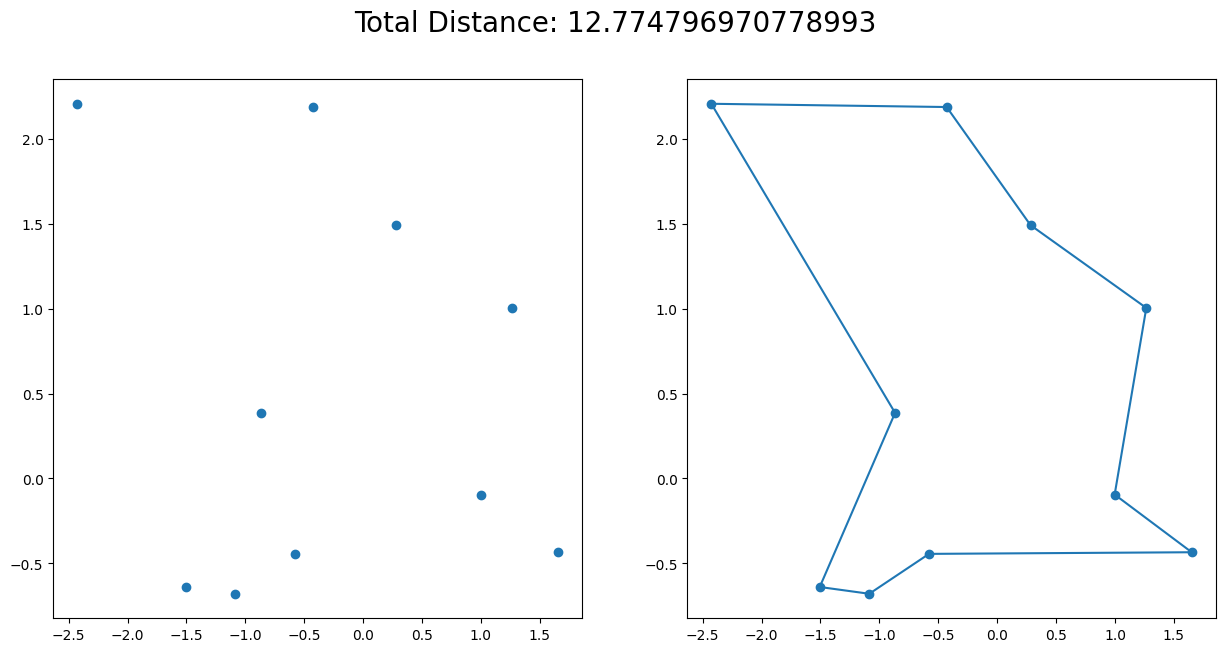

In [52]:
visualize_solution(cities, best_solution)